In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
classifier = DecisionTreeClassifier(max_depth = 2, criterion = "entropy")

In [10]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
y_pred = classifier.predict(X_test)

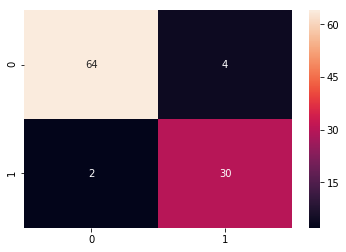

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Text(0, 0.5, 'Age')

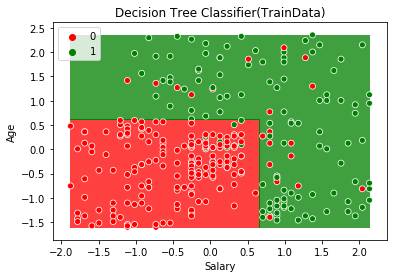

In [13]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
sns.scatterplot(X_set[:, 0], X_set[:, 1], hue = y_set, palette = {0:"red", 1:"green"})
plt.title("Decision Tree Classifier(TrainData)")
plt.xlabel("Salary")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

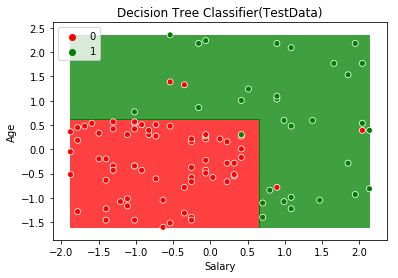

In [14]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
sns.scatterplot(X_set[:, 0], X_set[:, 1], hue = y_set, palette = {0:"red", 1:"green"})
plt.title("Decision Tree Classifier(TestData)")
plt.xlabel("Salary")
plt.ylabel("Age")

In [15]:
classifier.score(X_test, y_test)

0.94